#Load data

In [286]:
!pip install pycaret

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from PIL import Image
from io import BytesIO
from pycaret.regression import *
from pycaret.classification import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition


In [288]:
df=pd.read_csv("/content/train.csv")

#Thống kê dữ liệu

--missing value

-- tim kiếm outlier(boxplot,clustering)

***Epm_nEng_100ms***: Tốc độ trung bình của động cơ của một đoạn xi-lanh (**vòng/phút**)

***VehV_v_100ms***: Tốc độ của xe (**km/h**)

***ActMod_trqInr_100ms***: Mô-men xoắn hiện tại của động cơ được tính lại từ bên trong (**Nm**)

***RngMod_trqCrSmin_100ms***: Mô-men xoắn tối thiểu của động cơ ở mức trục khuỷu (**Nm**)

***CoVeh_trqAcs_100ms***: Yêu cầu mô-men xoắn của các phụ kiện (**Nm**)

***Clth_st_100ms***: Trạng thái được chuyển động của côn sau khi làm mờ (**-**)

***CoEng_st_100ms***: Trạng thái hoạt động của động cơ (**enum, 0 COENG_STANDBY, 1 COENG_READY, 2 COENG_CRANKING, 3 COENG_RUNNING, 4 COENG_STOPPING, 5 COENG_FINISH**)

***Com_rTSC1VRVCURtdrTq_100ms***: Mô-men xoắn mong muốn hoặc giới hạn mô-men xoắn (**%**)

***Com_rTSC1VRRDTrqReq_100ms***: Mô-men xoắn được yêu cầu bởi hạn chế (**retarder**) (**%**)

***RoadSlope_100ms***: Độ dốc thực tế từ chân trời ADASIS (**%, tan(slope) = (RoadSlope_100ms / 100)**)

***Vehicle_Mass***: Trọng lượng của xe, có thể là **38 t** hoặc **49 t**


In [289]:
df.head()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms,RoadSlope_100ms,Vehicle_Mass
0,902.5,67.72,1971.9360,-140.0,9.999747,0,3,0,0,1.5,38.0
1,1241.0,63.87,2604.0000,-196.0,9.999747,0,3,0,0,1.7,38.0
2,903.0,67.28,2208.0700,-140.0,9.999747,0,3,0,0,1.3,38.0
3,934.5,68.34,0.0000,-140.0,9.999747,0,3,0,0,-2.7,49.0
4,969.0,61.28,392.5794,-112.0,9.999747,0,3,0,0,2.3,49.0


In [290]:
df.shape

(8496, 11)

In [291]:
df.describe()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms,RoadSlope_100ms,Vehicle_Mass
count,8496.000000,8496.000000,8496.000000,8496.000000,8.496000e+03,8496.0,8496.0,8496.0,8496.0,8496.000000,8496.000000
mean,1104.671257,64.349988,1419.595527,-158.917143,9.999747e+00,0.0,3.0,0.0,0.0,0.877949,41.595457
std,157.267374,10.691505,989.412153,26.449961,3.552923e-15,0.0,0.0,0.0,0.0,2.201932,5.160024
min,481.500000,38.310000,0.000000,-308.000000,9.999747e+00,0.0,3.0,0.0,0.0,-4.800000,38.000000
25%,948.375000,57.092500,363.923300,-168.000000,9.999747e+00,0.0,3.0,0.0,0.0,-0.400000,38.000000
50%,1145.000000,67.375000,1627.500000,-168.000000,9.999747e+00,0.0,3.0,0.0,0.0,1.000000,38.000000
75%,1192.500000,71.580000,2348.739000,-140.000000,9.999747e+00,0.0,3.0,0.0,0.0,2.100000,49.000000
max,2119.500000,88.930000,2688.000000,-84.000000,9.999747e+00,0.0,3.0,0.0,0.0,5.000000,49.000000


In [292]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Epm_nEng_100ms,8496.0,1104.671257,1.572674e+02,481.500000,948.375000,1145.000000,1192.500000,2119.500000
VehV_v_100ms,8496.0,64.349988,1.069150e+01,38.310000,57.092500,67.375000,71.580000,88.930000
ActMod_trqInr_100ms,8496.0,1419.595527,9.894122e+02,0.000000,363.923300,1627.500000,2348.739000,2688.000000
RngMod_trqCrSmin_100ms,8496.0,-158.917143,2.644996e+01,-308.000000,-168.000000,-168.000000,-140.000000,-84.000000
CoVeh_trqAcs_100ms,8496.0,9.999747,3.552923e-15,9.999747,9.999747,9.999747,9.999747,9.999747
Clth_st_100ms,8496.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
CoEng_st_100ms,8496.0,3.000000,0.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000
Com_rTSC1VRVCURtdrTq_100ms,8496.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
Com_rTSC1VRRDTrqReq_100ms,8496.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
RoadSlope_100ms,8496.0,0.877949,2.201932e+00,-4.800000,-0.400000,1.000000,2.100000,5.000000


In [293]:
df["CoVeh_trqAcs_100ms"].value_counts()

9.999747    8496
Name: CoVeh_trqAcs_100ms, dtype: int64

In [294]:
summary = df["CoVeh_trqAcs_100ms"].describe()

# Convert the summary to a DataFrame
summary_df = pd.DataFrame(summary)
summary_df

,CoVeh_trqAcs_100ms
count,8.496000e+03
mean,9.999747e+00
std,3.552923e-15
min,9.999747e+00
25%,9.999747e+00
50%,9.999747e+00
75%,9.999747e+00
max,9.999747e+00


In [295]:
df.shape

(8496, 11)

In [296]:
df.isnull().any()

Epm_nEng_100ms                False
VehV_v_100ms                  False
ActMod_trqInr_100ms           False
RngMod_trqCrSmin_100ms        False
CoVeh_trqAcs_100ms            False
Clth_st_100ms                 False
CoEng_st_100ms                False
Com_rTSC1VRVCURtdrTq_100ms    False
Com_rTSC1VRRDTrqReq_100ms     False
RoadSlope_100ms               False
Vehicle_Mass                  False
dtype: bool

In [297]:
df2=df.copy()
duplicate_rows = df2.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8491    False
8492    False
8493    False
8494    False
8495    False
Length: 8496, dtype: bool

Cột chỉ có một giá trị

In [298]:
# Tìm các cột chỉ có một giá trị duy nhất
single_value_columns = df.columns[df.nunique() == 1]

# Hiển thị các cột chỉ có một giá trị duy nhất
print("Các cột chỉ có một giá trị duy nhất:")
for i in single_value_columns:
  print(i)

Các cột chỉ có một giá trị duy nhất:
CoVeh_trqAcs_100ms
Clth_st_100ms
CoEng_st_100ms
Com_rTSC1VRVCURtdrTq_100ms
Com_rTSC1VRRDTrqReq_100ms


In [299]:
df_after=df.copy()
df_after=df_after.drop(columns=single_value_columns)
df_after

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,RoadSlope_100ms,Vehicle_Mass
0,902.5,67.72,1971.9360,-140.0,1.5,38.0
1,1241.0,63.87,2604.0000,-196.0,1.7,38.0
2,903.0,67.28,2208.0700,-140.0,1.3,38.0
3,934.5,68.34,0.0000,-140.0,-2.7,49.0
4,969.0,61.28,392.5794,-112.0,2.3,49.0
...,...,...,...,...,...,...
8491,1422.5,50.49,2436.0000,-140.0,3.6,49.0
8492,1091.0,47.04,2635.5000,-112.0,4.2,49.0
8493,1154.5,71.32,2131.5000,-168.0,1.9,38.0
8494,907.0,67.58,2410.4340,-140.0,1.0,38.0


Epm_nEng_100ms

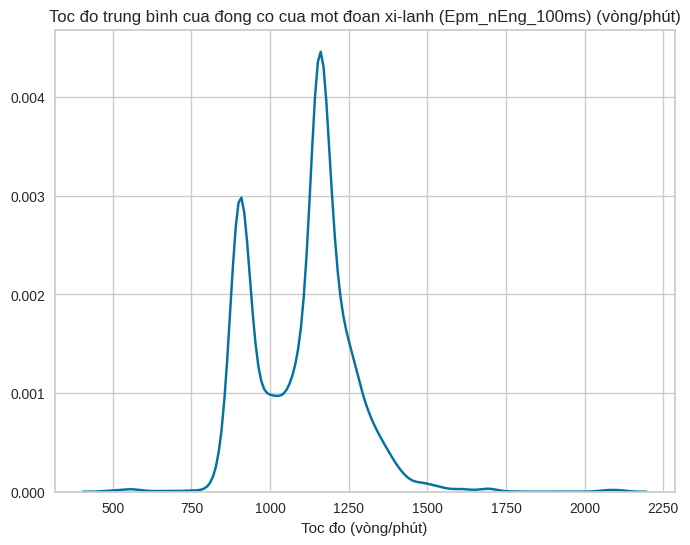

In [300]:
#biểu diễn Epm_nEng_100ms
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x="Epm_nEng_100ms")
plt.title("Toc đo trung bình cua đong co cua mot đoan xi-lanh (Epm_nEng_100ms) (vòng/phút)")
plt.xlabel("Toc đo (vòng/phút)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

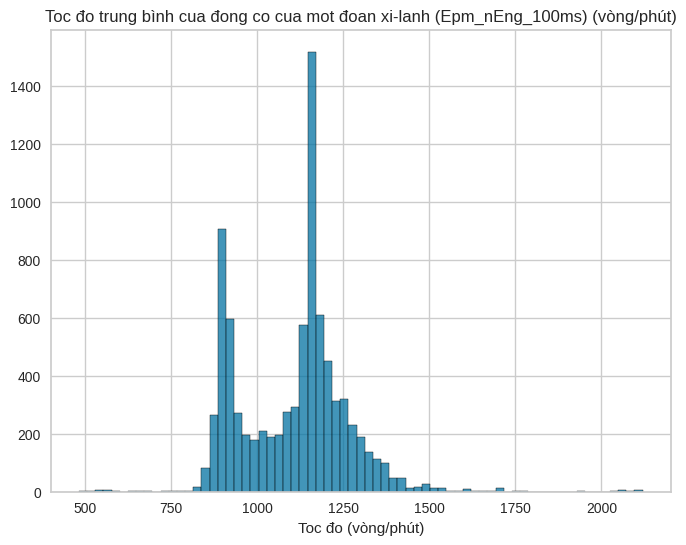

In [301]:
#biểu diễn Epm_nEng_100ms
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="Epm_nEng_100ms")
plt.title("Toc đo trung bình cua đong co cua mot đoan xi-lanh (Epm_nEng_100ms) (vòng/phút)")
plt.xlabel("Toc đo (vòng/phút)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

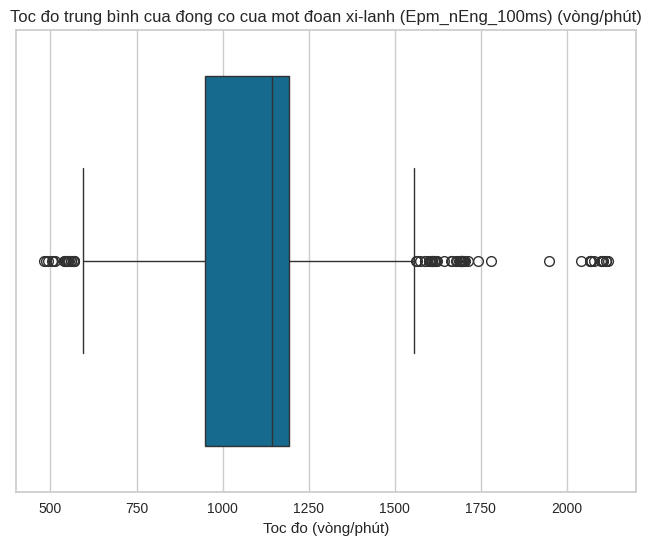

In [302]:
#biểu diễn Epm_nEng_100ms
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Epm_nEng_100ms")
plt.title("Toc đo trung bình cua đong co cua mot đoan xi-lanh (Epm_nEng_100ms) (vòng/phút)")
plt.xlabel("Toc đo (vòng/phút)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

In [303]:
lower_threshold_EPM = 500
upper_threshold_EPM = 1500

outliers = df[(df['Epm_nEng_100ms'] < lower_threshold_EPM) | (df['Epm_nEng_100ms'] > upper_threshold_EPM)]

# In ra các giá trị ngoại lệ
print("Các giá trị ngoại lệ:")
print(len(outliers))


Các giá trị ngoại lệ:
82


VehV_v_100ms

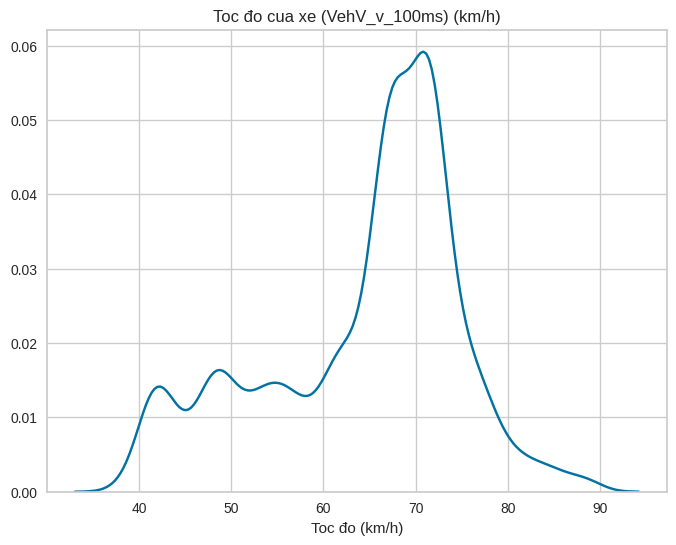

In [304]:
#biểu diễn VehV_v_100ms
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x="VehV_v_100ms")
plt.title("Toc đo cua xe (VehV_v_100ms) (km/h)")
plt.xlabel("Toc đo (km/h)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

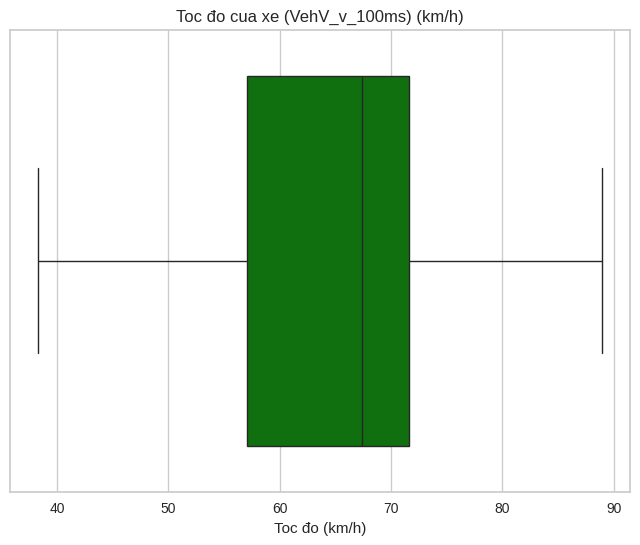

In [305]:
#biểu diễn VehV_v_100ms
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="VehV_v_100ms",color='green')
plt.title("Toc đo cua xe (VehV_v_100ms) (km/h)")
plt.xlabel("Toc đo (km/h)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

ActMod_trqInr_100ms

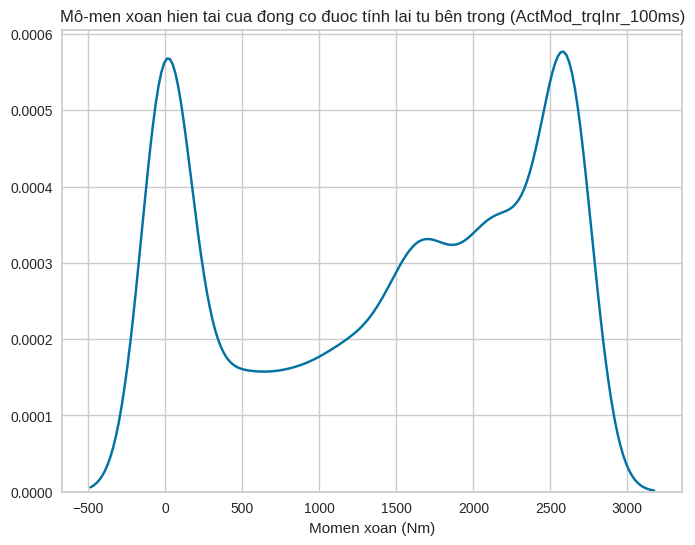

In [306]:
#biểu diễn ActMod_trqInr_100ms
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x="ActMod_trqInr_100ms")
plt.title("Mô-men xoan hien tai cua đong co đuoc tính lai tu bên trong (ActMod_trqInr_100ms)")
plt.xlabel("Momen xoan (Nm)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

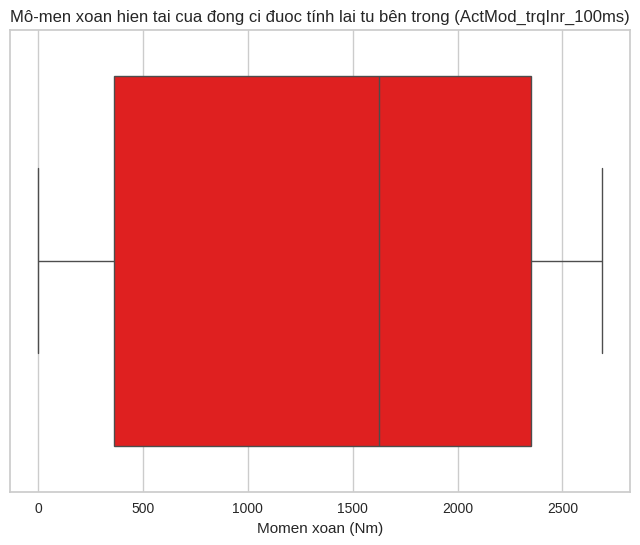

In [307]:
#biểu diễn ActMod_trqInr_100ms
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="ActMod_trqInr_100ms",color="red")
plt.title("Mô-men xoan hien tai cua đong ci đuoc tính lai tu bên trong (ActMod_trqInr_100ms)")
plt.xlabel("Momen xoan (Nm)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

RngMod_trqCrSmin_100ms

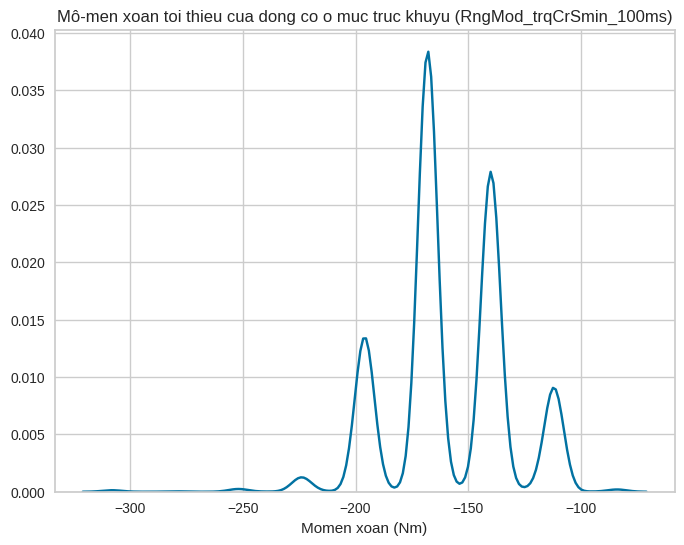

In [308]:
#biểu diễn RngMod_trqCrSmin_100ms
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x="RngMod_trqCrSmin_100ms")
plt.title("Mô-men xoan toi thieu cua dong co o muc truc khuyu (RngMod_trqCrSmin_100ms)")
plt.xlabel("Momen xoan (Nm)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

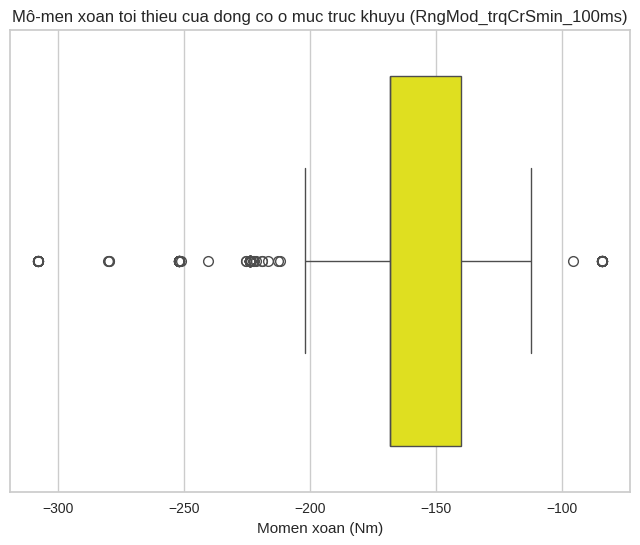

In [309]:
#biểu diễn RngMod_trqCrSmin_100ms
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="RngMod_trqCrSmin_100ms",color="yellow")
plt.title("Mô-men xoan toi thieu cua dong co o muc truc khuyu (RngMod_trqCrSmin_100ms)")
plt.xlabel("Momen xoan (Nm)")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

In [310]:
lower_threshold_RNG=-200
under_threshold_RNG=-100
outliers = df[(df['RngMod_trqCrSmin_100ms'] < lower_threshold_RNG) | (df['RngMod_trqCrSmin_100ms'] > under_threshold_RNG)]

# In ra các giá trị ngoại lệ
print("Các giá trị ngoại lệ:")
print(len(outliers))


Các giá trị ngoại lệ:
180


RoadSlope_100ms

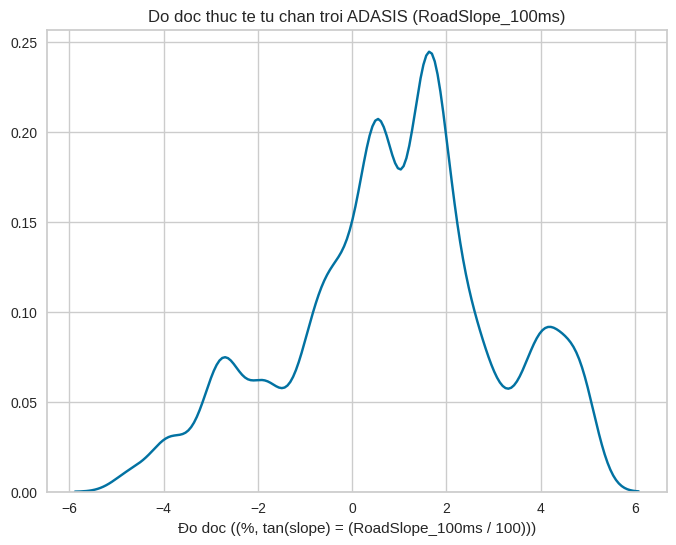

In [311]:
#biểu diễn RoadSlope_100ms
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x="RoadSlope_100ms")
plt.title("Do doc thuc te tu chan troi ADASIS (RoadSlope_100ms)")
plt.xlabel("Đo doc ((%, tan(slope) = (RoadSlope_100ms / 100)))")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

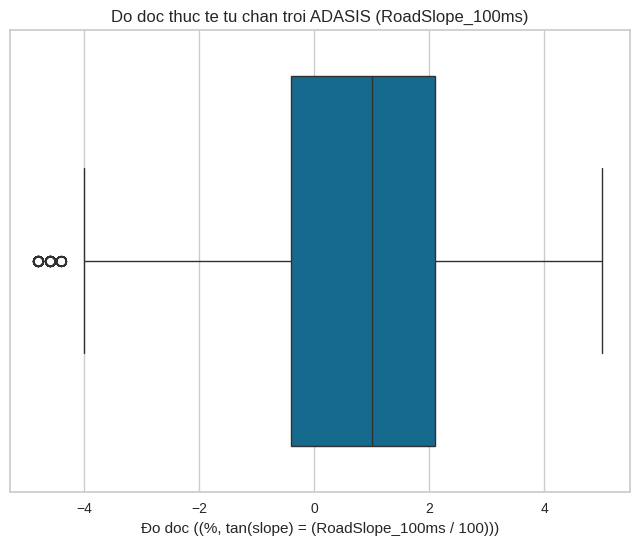

In [312]:
#biểu diễn RoadSlope_100ms
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="RoadSlope_100ms")
plt.title("Do doc thuc te tu chan troi ADASIS (RoadSlope_100ms)")
plt.xlabel("Đo doc ((%, tan(slope) = (RoadSlope_100ms / 100)))")
plt.ylabel("")
# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

In [313]:
columns_to_drop = ['VehV_v_100ms', 'ActMod_trqInr_100ms', 'CoVeh_trqAcs_100ms', 'Clth_st_100ms', 'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms', 'Com_rTSC1VRRDTrqReq_100ms', 'Vehicle_Mass']
df_check = df.drop(columns=columns_to_drop)
outlier_EPM = df_check[(df_check["Epm_nEng_100ms"] < 500) | (df_check["Epm_nEng_100ms"] > 1500)]
outlier_RNG = df_check[(df_check["RngMod_trqCrSmin_100ms"] < -200) | (df_check["RngMod_trqCrSmin_100ms"] > -100)]
outlier = df_check[df_check["RoadSlope_100ms"] < -4]
outlier_merge = df_check[((df_check["Epm_nEng_100ms"] < 500) | (df_check["Epm_nEng_100ms"] > 1500)) & (df_check["RoadSlope_100ms"] < -4)]
outlier_merge2=df_check[((df_check["Epm_nEng_100ms"] < 500) | (df_check["Epm_nEng_100ms"] > 1500)) & (df_check["RngMod_trqCrSmin_100ms"] < -200) | (df_check["RngMod_trqCrSmin_100ms"] > -100)]
print("Các dữ liệu của cột RoadSlope bị ảnh hưởng bởi ngoại lai từ các cột khác là: ",len(outlier_merge2))

Các dữ liệu của cột RoadSlope bị ảnh hưởng bởi ngoại lai từ các cột khác là:  95


Vehicle_mass

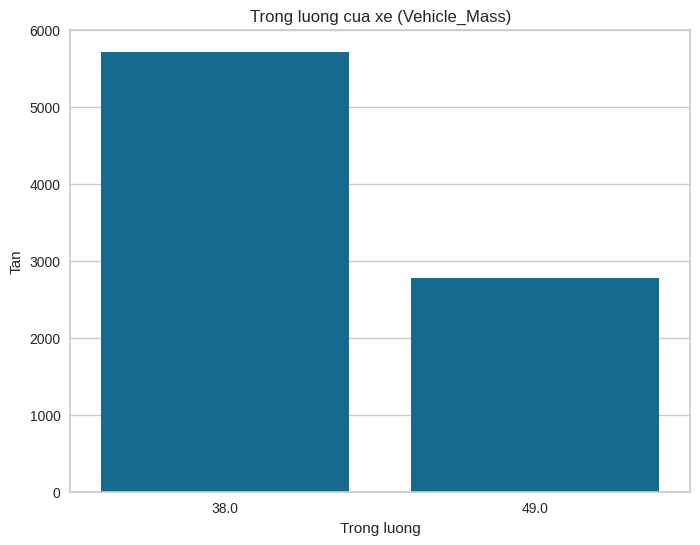

In [314]:

plt.figure(figsize=(8,6))
sns.countplot(x="Vehicle_Mass", data=df)
plt.title("Trong luong cua xe (Vehicle_Mass)")
plt.xlabel("Trong luong")
plt.ylabel("Tan")
### END SOLUTION

# Không chỉnh những dòng code này
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

Trước khi chuẩn hóa

In [315]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores (RoadSlope_100ms)")

In [316]:
df2=df.copy()
X=df2.drop(columns=['RoadSlope_100ms','Vehicle_Mass'])
y=df['RoadSlope_100ms']
discrete_features = X.dtypes == float

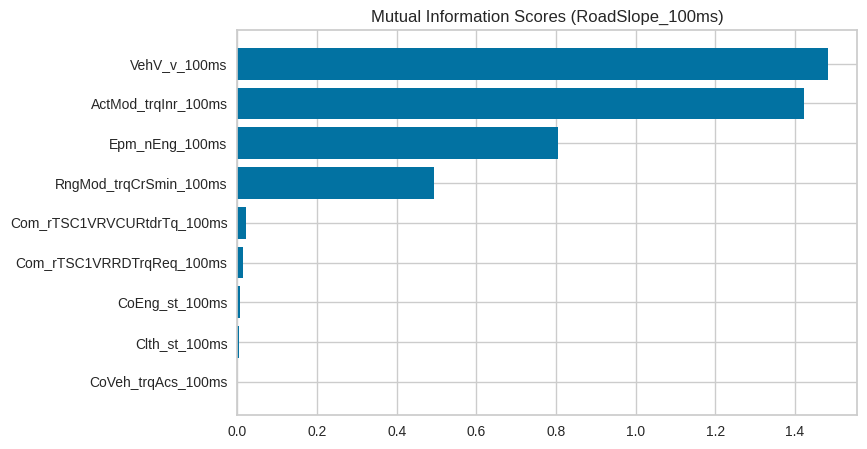

In [317]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [318]:
df2=df.copy()
X=df2.drop(columns=['RoadSlope_100ms','Vehicle_Mass'])
y=df['Vehicle_Mass']
discrete_features = X.dtypes == float

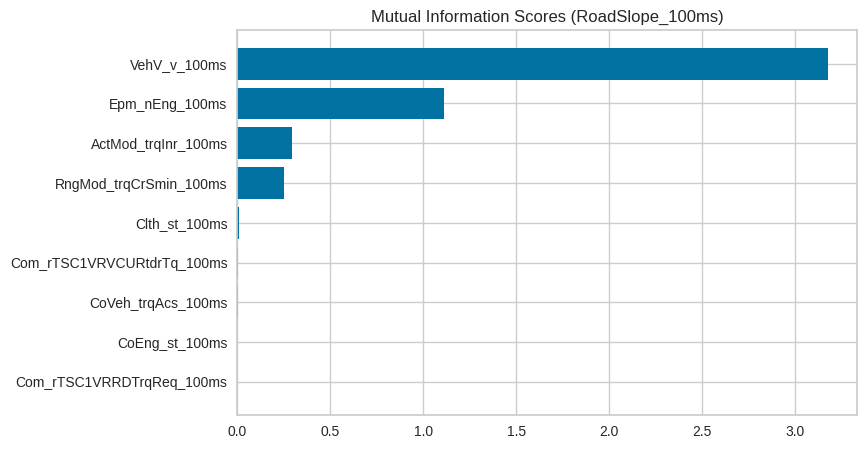

In [319]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

#Chuẩn hóa dữ liệu

--feature scalling

--imbalance (cách xử lý trên đấy) (oversampling, undersampling)

--Giảm chiều dữ liệu ()

--Mã hóa dữ liệu

In [320]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [321]:
variances = df.var()

# In ra ngưỡng phương sai của từng cột
print(variances)


Epm_nEng_100ms                2.473303e+04
VehV_v_100ms                  1.143083e+02
ActMod_trqInr_100ms           9.789364e+05
RngMod_trqCrSmin_100ms        6.996004e+02
CoVeh_trqAcs_100ms            1.262326e-29
Clth_st_100ms                 0.000000e+00
CoEng_st_100ms                0.000000e+00
Com_rTSC1VRVCURtdrTq_100ms    0.000000e+00
Com_rTSC1VRRDTrqReq_100ms     0.000000e+00
RoadSlope_100ms               4.848504e+00
Vehicle_Mass                  2.662585e+01
dtype: float64


In [322]:
len(X)

8496

In [323]:
columns_drop=["CoEng_st_100ms","Clth_st_100ms","Com_rTSC1VRVCURtdrTq_100ms","Com_rTSC1VRRDTrqReq_100ms","CoVeh_trqAcs_100ms"]

In [324]:
df_after=df.drop(columns_drop,axis=1)
#chuẩn hóa robust scaler
from sklearn.preprocessing import RobustScaler
df_after.columns=df_after.columns
#chuẩn hóa
scaler=RobustScaler()
df_ch=scaler.fit_transform(df_after)
#chuyển về dataframe
df_ch=pd.DataFrame(df_ch)
#đặt lại tên cột
df_ch.columns=df_after.columns
df_ch

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,RoadSlope_100ms,Vehicle_Mass
0,-0.993344,0.023814,0.173536,1.0,0.20,0.0
1,0.393241,-0.241933,0.491985,-1.0,0.28,0.0
2,-0.991295,-0.006557,0.292506,1.0,0.12,0.0
3,-0.862263,0.066609,-0.819975,1.0,-1.48,1.0
4,-0.720942,-0.420708,-0.622184,2.0,0.52,1.0
...,...,...,...,...,...,...
8491,1.136713,-1.165487,0.407343,1.0,1.04,1.0
8492,-0.221198,-1.403624,0.507856,2.0,1.28,1.0
8493,0.038914,0.272304,0.253928,0.0,0.36,0.0
8494,-0.974910,0.014150,0.394462,1.0,0.00,0.0


In [325]:
df_ch

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,RoadSlope_100ms,Vehicle_Mass
0,-0.993344,0.023814,0.173536,1.0,0.20,0.0
1,0.393241,-0.241933,0.491985,-1.0,0.28,0.0
2,-0.991295,-0.006557,0.292506,1.0,0.12,0.0
3,-0.862263,0.066609,-0.819975,1.0,-1.48,1.0
4,-0.720942,-0.420708,-0.622184,2.0,0.52,1.0
...,...,...,...,...,...,...
8491,1.136713,-1.165487,0.407343,1.0,1.04,1.0
8492,-0.221198,-1.403624,0.507856,2.0,1.28,1.0
8493,0.038914,0.272304,0.253928,0.0,0.36,0.0
8494,-0.974910,0.014150,0.394462,1.0,0.00,0.0


In [326]:
df_vehice_mass=df_ch.drop(["Vehicle_Mass","RoadSlope_100ms"],axis=1)
df_road_slope=df_ch.drop(["Vehicle_Mass","RoadSlope_100ms"],axis=1)

In [327]:
df_vehice_mass

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
0,-0.993344,0.023814,0.173536,1.0
1,0.393241,-0.241933,0.491985,-1.0
2,-0.991295,-0.006557,0.292506,1.0
3,-0.862263,0.066609,-0.819975,1.0
4,-0.720942,-0.420708,-0.622184,2.0
...,...,...,...,...
8491,1.136713,-1.165487,0.407343,1.0
8492,-0.221198,-1.403624,0.507856,2.0
8493,0.038914,0.272304,0.253928,0.0
8494,-0.974910,0.014150,0.394462,1.0


In [328]:
X_slope=X_vehice=df_ch.drop(["Vehicle_Mass","RoadSlope_100ms"],axis=1)
y_vehice=df_ch["Vehicle_Mass"]
y_slope=df_ch["RoadSlope_100ms"]

In [329]:
X_vehice

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
0,-0.993344,0.023814,0.173536,1.0
1,0.393241,-0.241933,0.491985,-1.0
2,-0.991295,-0.006557,0.292506,1.0
3,-0.862263,0.066609,-0.819975,1.0
4,-0.720942,-0.420708,-0.622184,2.0
...,...,...,...,...
8491,1.136713,-1.165487,0.407343,1.0
8492,-0.221198,-1.403624,0.507856,2.0
8493,0.038914,0.272304,0.253928,0.0
8494,-0.974910,0.014150,0.394462,1.0


In [330]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [331]:
X_vehice_over, y_vehice_over = SMOTE().fit_resample(X_vehice, y_vehice)
X_vehice_under, y_vehice_under = RandomUnderSampler().fit_resample(X_vehice, y_vehice)

In [332]:
X_vehice_over

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
0,-0.993344,0.023814,0.173536,1.0
1,0.393241,-0.241933,0.491985,-1.0
2,-0.991295,-0.006557,0.292506,1.0
3,-0.862263,0.066609,-0.819975,1.0
4,-0.720942,-0.420708,-0.622184,2.0
...,...,...,...,...
11433,-0.523692,-0.978537,-0.028632,2.0
11434,0.196854,-1.737932,0.493749,2.0
11435,-0.359789,-0.920220,-0.598956,1.0
11436,0.523984,-0.161401,-0.819975,0.0


In [333]:
X_vehice_under

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
0,-1.040451,-0.072821,-0.521963,0.0
1,0.077829,0.313719,0.239821,0.0
2,-1.038402,-0.084556,0.197499,1.0
3,0.178187,0.424159,-0.819975,-1.0
4,0.008193,-0.628473,0.491985,0.0
...,...,...,...,...
5549,-0.327701,-0.732010,-0.819975,0.0
5550,-0.491551,-0.968766,-0.122109,1.0
5551,0.430108,-1.593443,0.506092,1.0
5552,1.136713,-1.165487,0.407343,1.0


In [334]:
df2=df.copy()
X=df2.drop(columns=['RoadSlope_100ms','Vehicle_Mass'])
y=df['Vehicle_Mass']
kf = KFold(n_splits=8, shuffle=True, random_state=42)

#Lựa chọn mô hình

In [336]:
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [337]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
acc_vehice_log=[]
pre_vehice_log=[]
recall_vehice_log=[]
acc_vehice_svm=[]
pre_vehice_svm=[]
recall_vehice_svm=[]
acc_vehice_dt=[]
pre_vehice_dt=[]
recall_vehice_dt=[]
for train_ids, val_ids in kf.split(X_vehice_over,y_vehice_over):
    model=LogisticRegression()
    model.fit(X_vehice_over.iloc[train_ids],y_vehice_over.iloc[train_ids])
    y_pred=model.predict(X_vehice_over.iloc[val_ids])
    acc_vehice_log.append(model.score(X_vehice_over.iloc[val_ids],y_vehice_over.iloc[val_ids]))
    pre_vehice_log.append(precision_score(y_vehice_over.iloc[val_ids],y_pred))
    recall_vehice_log.append(recall_score(y_vehice_over.iloc[val_ids],y_pred))
    model1=SVC()
    model1.fit(X_vehice_over.iloc[train_ids],y_vehice_over.iloc[train_ids])
    y_pred=model1.predict(X_vehice_over.iloc[val_ids])
    acc_vehice_svm.append(model1.score(X_vehice_over.iloc[val_ids],y_vehice_over.iloc[val_ids]))
    pre_vehice_svm.append(precision_score(y_vehice_over.iloc[val_ids],y_pred))
    recall_vehice_svm.append(recall_score(y_vehice_over.iloc[val_ids],y_pred))
    model2=DecisionTreeClassifier()
    model2.fit(X_vehice_over.iloc[train_ids],y_vehice_over.iloc[train_ids])
    y_pred=model2.predict(X_vehice_over.iloc[val_ids])
    acc_vehice_dt.append(model2.score(X_vehice_over.iloc[val_ids],y_vehice_over.iloc[val_ids]))
    pre_vehice_dt.append(precision_score(y_vehice_over.iloc[val_ids],y_pred))
    recall_vehice_dt.append(recall_score(y_vehice_over.iloc[val_ids],y_pred))

Text(0.5, 0, 'Accuracy')

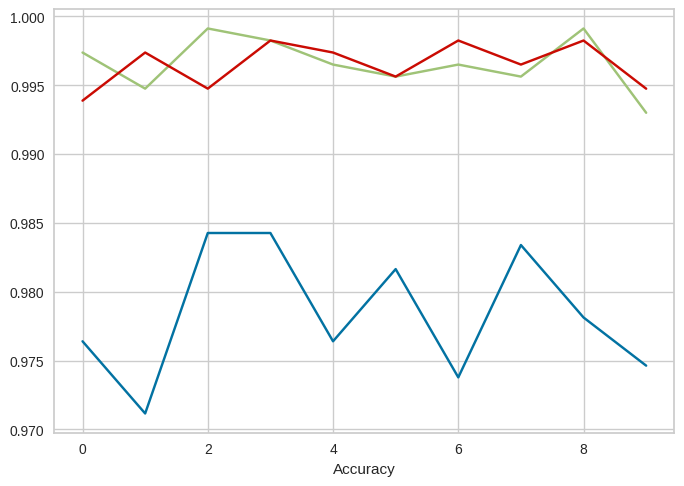

In [338]:
#draw graph
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(10)
plt.plot(x,acc_vehice_log,label="Logistic Regression")
plt.plot(x,acc_vehice_svm,label="Support Vector Machine")
plt.plot(x,acc_vehice_dt,label="Decision Tree Classifier")
plt.xlabel("Accuracy")


Text(0.5, 0, 'Recall')

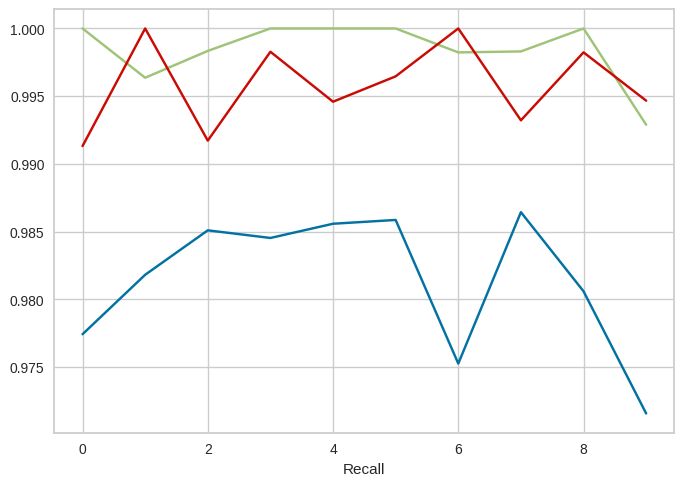

In [339]:
#recall
x=np.arange(10)
plt.plot(x,recall_vehice_log,label="Logistic Regression")
plt.plot(x,recall_vehice_svm,label="Support Vector Machine")
plt.plot(x,recall_vehice_dt,label="Decision Tree Classifier")
plt.xlabel("Recall")

Text(0.5, 0, 'Precision')

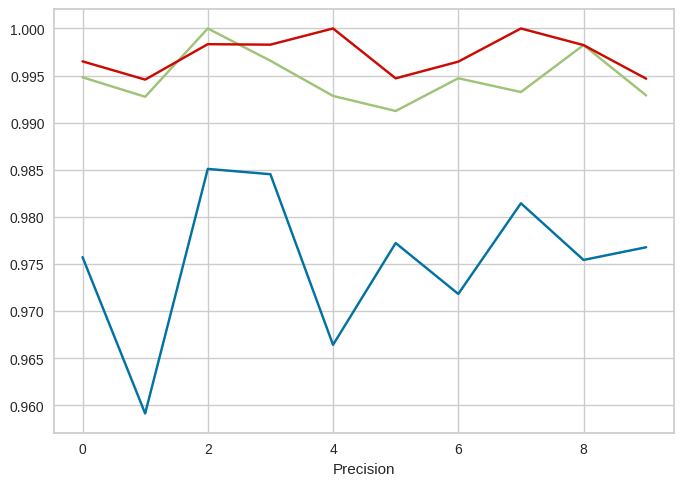

In [340]:
#precision
x=np.arange(10)
plt.plot(x,pre_vehice_log,label="Logistic Regression")
plt.plot(x,pre_vehice_svm,label="Support Vector Machine")
plt.plot(x,pre_vehice_dt,label="Decision Tree Classifier")
plt.xlabel("Precision")

In [341]:
data_log={"accuracy":acc_vehice_log,"precision":pre_vehice_log,"recall":recall_vehice_log}
data_log=pd.DataFrame(data_log)
data_dt={"accuracy":acc_vehice_dt,"precision":pre_vehice_dt,"recall":recall_vehice_dt}
data_dt=pd.DataFrame(data_dt)
data_svm={"accuracy":acc_vehice_svm,"precision":pre_vehice_svm,"recall":recall_vehice_svm}
data_svm=pd.DataFrame(data_svm)

In [342]:
data_svm

,accuracy,precision,recall
0,0.997378,0.994819,1.000000
1,0.994755,0.992754,0.996364
2,0.999126,1.000000,0.998344
3,0.998252,0.996575,1.000000
4,0.996503,0.992844,1.000000
5,0.995629,0.991243,1.000000
6,0.996503,0.994718,0.998233
7,0.995629,0.993255,0.998305
8,0.999125,0.998239,1.000000
9,0.993001,0.992895,0.992895


In [343]:
data_dt

,accuracy,precision,recall
0,0.993881,0.996510,0.991319
1,0.997378,0.994575,1.000000
2,0.994755,0.998333,0.991722
3,0.998252,0.998282,0.998282
4,0.997378,1.000000,0.994595
5,0.995629,0.994709,0.996466
6,0.998252,0.996479,1.000000
7,0.996503,1.000000,0.993220
8,0.998250,0.998236,0.998236
9,0.994751,0.994671,0.994671


In [344]:
data_log

,accuracy,precision,recall
0,0.976399,0.975737,0.977431
1,0.971154,0.959147,0.981818
2,0.984266,0.985099,0.985099
3,0.984266,0.984536,0.984536
4,0.976399,0.966431,0.985586
5,0.981643,0.977233,0.985866
6,0.973776,0.971831,0.975265
7,0.983392,0.981450,0.986441
8,0.978128,0.975439,0.980600
9,0.974628,0.976786,0.971581


In [345]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
acc_vehice_log=[]
pre_vehice_log=[]
recall_vehice_log=[]
acc_vehice_svm=[]
pre_vehice_svm=[]
recall_vehice_svm=[]
acc_vehice_dt=[]
pre_vehice_dt=[]
recall_vehice_dt=[]
for train_ids, val_ids in kf.split(X_vehice_under,y_vehice_under):
    model=LogisticRegression()
    model.fit(X_vehice_under.iloc[train_ids],y_vehice_under.iloc[train_ids])
    y_pred=model.predict(X_vehice_under.iloc[val_ids])
    acc_vehice_log.append(model.score(X_vehice_under.iloc[val_ids],y_vehice_under.iloc[val_ids]))
    pre_vehice_log.append(precision_score(y_vehice_under.iloc[val_ids],y_pred))
    recall_vehice_log.append(recall_score(y_vehice_under.iloc[val_ids],y_pred))
    model1=SVC()
    model1.fit(X_vehice_under.iloc[train_ids],y_vehice_under.iloc[train_ids])
    y_pred=model1.predict(X_vehice_under.iloc[val_ids])
    acc_vehice_svm.append(model1.score(X_vehice_under.iloc[val_ids],y_vehice_under.iloc[val_ids]))
    pre_vehice_svm.append(precision_score(y_vehice_under.iloc[val_ids],y_pred))
    recall_vehice_svm.append(recall_score(y_vehice_under.iloc[val_ids],y_pred))
    model2=DecisionTreeClassifier()
    model2.fit(X_vehice_under.iloc[train_ids],y_vehice_under.iloc[train_ids])
    y_pred=model2.predict(X_vehice_under.iloc[val_ids])
    acc_vehice_dt.append(model2.score(X_vehice_under.iloc[val_ids],y_vehice_under.iloc[val_ids]))
    pre_vehice_dt.append(precision_score(y_vehice_under.iloc[val_ids],y_pred))
    recall_vehice_dt.append(recall_score(y_vehice_under.iloc[val_ids],y_pred))

Text(0.5, 0, 'Accuracy')

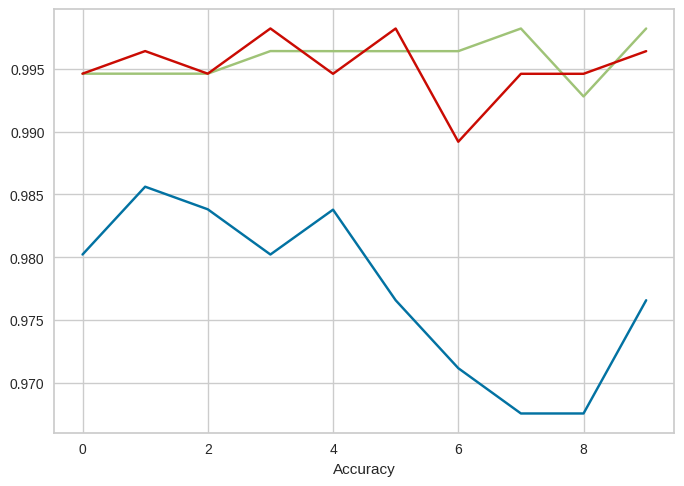

In [346]:
#draw graph
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(10)
plt.plot(x,acc_vehice_log,label="Logistic Regression")
plt.plot(x,acc_vehice_svm,label="Support Vector Machine")
plt.plot(x,acc_vehice_dt,label="Decision Tree Classifier")
plt.xlabel("Accuracy")


In [347]:
recall_vehice_svm

[0.9925093632958801,
 0.992619926199262,
 0.9960629921259843,
 0.9965277777777778,
 0.9928571428571429,
 1.0,
 0.9964912280701754,
 1.0,
 0.9964912280701754,
 1.0]

Text(0.5, 0, 'Recall')

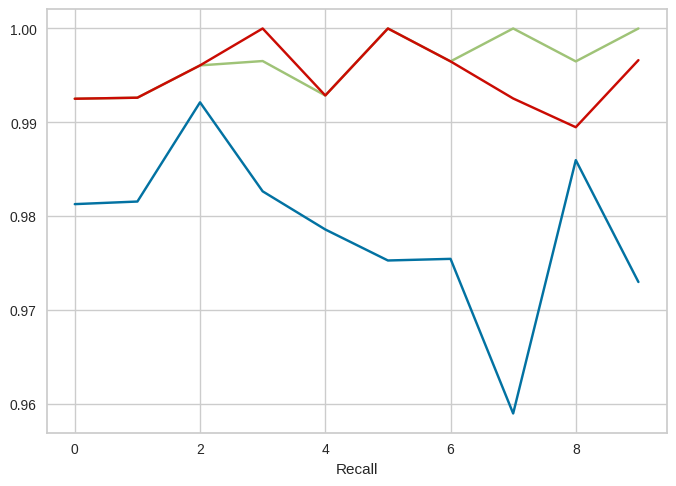

In [348]:
#recall
x=np.arange(10)
plt.plot(x,recall_vehice_log,label="Logistic Regression")
plt.plot(x,recall_vehice_svm,label="Support Vector Machine")
plt.plot(x,recall_vehice_dt,label="Decision Tree Classifier")
plt.xlabel("Recall")

Text(0.5, 0, 'Precision')

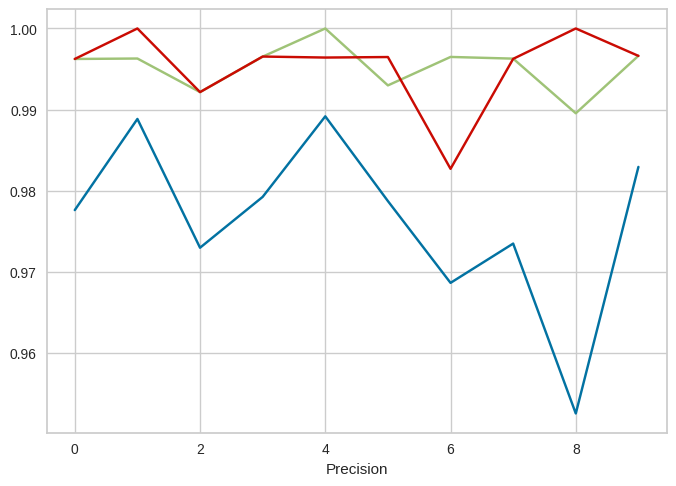

In [349]:
#precision
x=np.arange(10)
plt.plot(x,pre_vehice_log,label="Logistic Regression")
plt.plot(x,pre_vehice_svm,label="Support Vector Machine")
plt.plot(x,pre_vehice_dt,label="Decision Tree Classifier")
plt.xlabel("Precision")

In [350]:
data_log={"accuracy":acc_vehice_log,"precision":pre_vehice_log,"recall":recall_vehice_log}
data_log=pd.DataFrame(data_log)
data_dt={"accuracy":acc_vehice_dt,"precision":pre_vehice_dt,"recall":recall_vehice_dt}
data_dt=pd.DataFrame(data_dt)
data_svm={"accuracy":acc_vehice_svm,"precision":pre_vehice_svm,"recall":recall_vehice_svm}
data_svm=pd.DataFrame(data_svm)

In [351]:
data_svm

,accuracy,precision,recall
0,0.994604,0.996241,0.992509
1,0.994604,0.996296,0.992620
2,0.994604,0.992157,0.996063
3,0.996403,0.996528,0.996528
4,0.996396,1.000000,0.992857
5,0.996396,0.992982,1.000000
6,0.996396,0.996491,0.996491
7,0.998198,0.996283,1.000000
8,0.992793,0.989547,0.996491
9,0.998198,0.996633,1.000000


In [352]:
data_dt

,accuracy,precision,recall
0,0.994604,0.996241,0.992509
1,0.996403,1.000000,0.992620
2,0.994604,0.992157,0.996063
3,0.998201,0.996540,1.000000
4,0.994595,0.996416,0.992857
5,0.998198,0.996479,1.000000
6,0.989189,0.982699,0.996491
7,0.994595,0.996255,0.992537
8,0.994595,1.000000,0.989474
9,0.996396,0.996622,0.996622


In [353]:
data_log

,accuracy,precision,recall
0,0.980216,0.977612,0.981273
1,0.985612,0.988848,0.981550
2,0.983813,0.972973,0.992126
3,0.980216,0.979239,0.982639
4,0.983784,0.989170,0.978571
5,0.976577,0.978723,0.975265
6,0.971171,0.968641,0.975439
7,0.967568,0.973485,0.958955
8,0.967568,0.952542,0.985965
9,0.976577,0.982935,0.972973


In [356]:
X_slope

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
0,-0.993344,0.023814,0.173536,1.0
1,0.393241,-0.241933,0.491985,-1.0
2,-0.991295,-0.006557,0.292506,1.0
3,-0.862263,0.066609,-0.819975,1.0
4,-0.720942,-0.420708,-0.622184,2.0
...,...,...,...,...
8491,1.136713,-1.165487,0.407343,1.0
8492,-0.221198,-1.403624,0.507856,2.0
8493,0.038914,0.272304,0.253928,0.0
8494,-0.974910,0.014150,0.394462,1.0


#Pycaret

In [370]:
df_ch

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,RoadSlope_100ms,Vehicle_Mass
0,-0.993344,0.023814,0.173536,1.0,0.20,0.0
1,0.393241,-0.241933,0.491985,-1.0,0.28,0.0
2,-0.991295,-0.006557,0.292506,1.0,0.12,0.0
3,-0.862263,0.066609,-0.819975,1.0,-1.48,1.0
4,-0.720942,-0.420708,-0.622184,2.0,0.52,1.0
...,...,...,...,...,...,...
8491,1.136713,-1.165487,0.407343,1.0,1.04,1.0
8492,-0.221198,-1.403624,0.507856,2.0,1.28,1.0
8493,0.038914,0.272304,0.253928,0.0,0.36,0.0
8494,-0.974910,0.014150,0.394462,1.0,0.00,0.0


In [373]:
df_slope=df_ch.drop(["Vehicle_Mass"],axis=1)
df_slope

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,RoadSlope_100ms
0,-0.993344,0.023814,0.173536,1.0,0.20
1,0.393241,-0.241933,0.491985,-1.0,0.28
2,-0.991295,-0.006557,0.292506,1.0,0.12
3,-0.862263,0.066609,-0.819975,1.0,-1.48
4,-0.720942,-0.420708,-0.622184,2.0,0.52
...,...,...,...,...,...
8491,1.136713,-1.165487,0.407343,1.0,1.04
8492,-0.221198,-1.403624,0.507856,2.0,1.28
8493,0.038914,0.272304,0.253928,0.0,0.36
8494,-0.974910,0.014150,0.394462,1.0,0.00


In [374]:
from pycaret.regression import *
clf_setup = setup(data=df_slope, target='RoadSlope_100ms', session_id=42)
best = compare_models()

,Description,Value
0,Session id,42
1,Target,RoadSlope_100ms
2,Target type,Regression
3,Original data shape,"(8496, 5)"
4,Transformed data shape,"(8496, 5)"
5,Transformed train set shape,"(5947, 5)"
6,Transformed test set shape,"(2549, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0812,0.0331,0.1811,0.9571,0.0899,0.1640,0.4660
rf,Random Forest Regressor,0.1017,0.0509,0.2248,0.9340,0.1064,0.2064,1.1140
knn,K Neighbors Regressor,0.1017,0.0546,0.2327,0.9290,0.1093,0.2278,0.0280
xgboost,Extreme Gradient Boosting,0.1254,0.0589,0.2417,0.9237,0.1157,0.2757,0.1550
lightgbm,Light Gradient Boosting Machine,0.1552,0.0725,0.2686,0.9059,0.1334,0.3515,0.9100
dt,Decision Tree Regressor,0.0919,0.0841,0.2893,0.8907,0.1089,0.1981,0.0320
gbr,Gradient Boosting Regressor,0.2170,0.1264,0.3552,0.8356,0.1651,0.4425,0.4980
ada,AdaBoost Regressor,0.3230,0.2010,0.4481,0.7387,0.2499,0.6311,0.1130
lar,Least Angle Regression,0.3484,0.2455,0.4950,0.6807,0.2189,0.8340,0.0190
br,Bayesian Ridge,0.3484,0.2455,0.4950,0.6807,0.2189,0.8338,0.0180


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [375]:
from pycaret.classification import *

In [376]:
df_vehice=df_ch.drop(["RoadSlope_100ms"],axis=1)
df_vehice

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,Vehicle_Mass
0,-0.993344,0.023814,0.173536,1.0,0.0
1,0.393241,-0.241933,0.491985,-1.0,0.0
2,-0.991295,-0.006557,0.292506,1.0,0.0
3,-0.862263,0.066609,-0.819975,1.0,1.0
4,-0.720942,-0.420708,-0.622184,2.0,1.0
...,...,...,...,...,...
8491,1.136713,-1.165487,0.407343,1.0,1.0
8492,-0.221198,-1.403624,0.507856,2.0,1.0
8493,0.038914,0.272304,0.253928,0.0,0.0
8494,-0.974910,0.014150,0.394462,1.0,0.0


In [377]:
clf_setup = setup(data=df_vehice, target='Vehicle_Mass', session_id=42)
best = compare_models()

,Description,Value
0,Session id,42
1,Target,Vehicle_Mass
2,Target type,Binary
3,Original data shape,"(8496, 5)"
4,Transformed data shape,"(8496, 5)"
5,Transformed train set shape,"(5947, 5)"
6,Transformed test set shape,"(2549, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9983,1.0000,0.9990,0.9959,0.9974,0.9962,0.9962,0.2800
rf,Random Forest Classifier,0.9978,1.0000,0.9959,0.9974,0.9967,0.9950,0.9950,0.4680
lightgbm,Light Gradient Boosting Machine,0.9975,0.9999,0.9949,0.9974,0.9961,0.9943,0.9943,0.8060
xgboost,Extreme Gradient Boosting,0.9970,0.9999,0.9959,0.9949,0.9954,0.9931,0.9931,0.0860
gbc,Gradient Boosting Classifier,0.9965,0.9998,0.9928,0.9964,0.9946,0.9920,0.9920,0.5400
knn,K Neighbors Classifier,0.9953,0.9992,0.9979,0.9879,0.9929,0.9893,0.9894,0.1120
dt,Decision Tree Classifier,0.9945,0.9934,0.9902,0.9928,0.9915,0.9874,0.9874,0.0330
ada,Ada Boost Classifier,0.9907,0.9991,0.9799,0.9917,0.9857,0.9789,0.9790,0.2260
qda,Quadratic Discriminant Analysis,0.9786,0.9984,0.9506,0.9836,0.9667,0.9510,0.9514,0.0380
svm,SVM - Linear Kernel,0.9754,0.0000,0.9660,0.9598,0.9626,0.9443,0.9447,0.0280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]